<a href="https://colab.research.google.com/github/DylanC3/DylanC3.github.io/blob/master/Copy_of_DATA_301_Lab_1A_Dylan_Cho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**ENTER YOUR WRITTEN EXPLANATION HERE.**

In [ ]:
# 1) A little over 10% for both
# 2) Also a little over 10% for both

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [46]:
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_sp = pd.read_csv(data_dir + "sp500.csv")

df_sp = df_sp.set_index("Name")
df_sp

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798
...,...,...,...,...
XYL,2018-02-01,$72.50,$74.84,1817612
YUM,2018-02-01,$84.24,$83.98,1685275
ZBH,2018-02-01,$126.35,$128.19,1756300


**ENTER YOUR WRITTEN EXPLANATION HERE.**

In [ ]:
# Observational unit is a stock included in the S&P 500
# Natural to use the name (ticker) as index

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

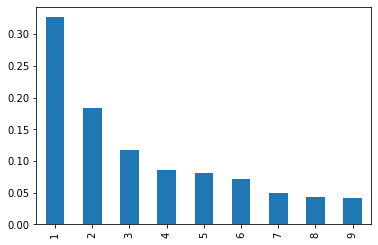

In [47]:
df_sp["volume"] = df_sp["volume"].astype(str)

# dataset is cleaned and has no vol. starting w/ zero.
def first_digit_func(s):
  return s[0]

df_sp["first_digit"] = df_sp["volume"].map(first_digit_func)
df_sp["first_digit"].value_counts(normalize=True).plot.bar()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

In [ ]:
# this was much different than I originally predicted. I incorrectly assumed that
# all numbers have the same percentages. Here we can see that lower numbers are 
# much more prominent at the beginning.

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

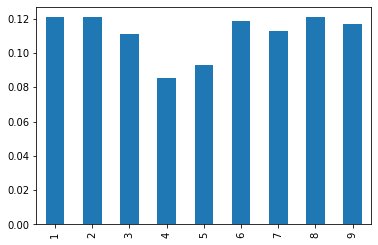

In [48]:
def last_digit_func(s):
  i = len(s) - 1
  while(1):
    if s[i] != '0': # check to make sure last digit not 0
      break
    i -= 1
  return s[i]

last_digit_func("109870")
df_sp["last_digit"] = df_sp["volume"].map(last_digit_func)
df_sp["last_digit"].value_counts(normalize=True).sort_index().plot.bar()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

In [ ]:
# This was much more like my original prediction.

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

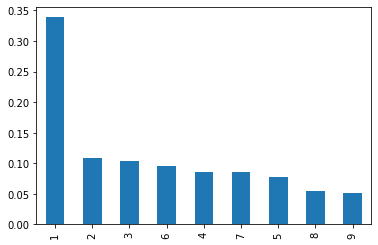

In [49]:
def first_digit_close_func(s):
  return s[1]

df_sp["first_digit_close"] = df_sp["close"].map(first_digit_close_func)
df_sp["first_digit_close"].value_counts(normalize=True).plot.bar()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

In [ ]:
# Everything hovers around 10% aside from 1 which is disproportionately more common
# Pandas infered it as a string because "$" is not a number